In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import decode_fnc, plot_fnc, compute_arrow
os.chdir('/data/users4/xli/interpolation')
from models.vae import VAE
os.chdir('/data/users4/xli/interpolation/visualization')

In [ ]:
data_path = '/data/users4/xli/interpolation/results'
res_path = '/data/users4/xli/interpolation/visualization'

data_dim = 1378
latent_dim = 2

hidden_dim_sz = [128, 64, 32]
n_layer_sz = 3
seed_sz = 3
res_path_sz = os.path.join(data_path, f'sfnc_sz/vae/hypopt/layer{n_layer_sz}/seed{seed_sz}')
grid_jv_sz = np.load(os.path.join(res_path_sz, 'grid_jv.npy'))

model_sz = VAE(input_dim=data_dim, 
            latent_dim=latent_dim, 
            hidden_dims=hidden_dim_sz, 
            seed=seed_sz)
ckpt_file_sz = os.path.join(res_path_sz, os.path.join(res_path_sz, f'vae_bs16_lr0.001_seed{seed_sz}.pt'))
checkpoint_sz = torch.load(ckpt_file_sz, map_location=torch.device('cpu'), weights_only=False)
model_sz.load_state_dict(checkpoint_sz)
model_sz.eval()

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=1378, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.5)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): LeakyReLU(negative_slope=0.5)
  )
  (fc_mean): Linear(in_features=32, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=32, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.5)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.5)
    (6): Linear(in_features=128, out_features=1378, bias=True)
  )
)

In [3]:
hidden_dim_asd = [64, 16]
n_layer_asd = 2
seed_asd = 6
res_path_asd = os.path.join(data_path, f'sfnc_asd/vae/hypopt/layer{n_layer_asd}/seed{seed_asd}')
grid_jv_asd = np.load(os.path.join(res_path_asd, 'grid_jv.npy'))

model_asd = VAE(input_dim=data_dim, 
            latent_dim=latent_dim, 
            hidden_dims=hidden_dim_asd, 
            seed=seed_asd)
ckpt_file_asd = os.path.join(res_path_asd, os.path.join(res_path_asd, f'vae_bs16_lr0.001_seed{seed_asd}.pt'))
checkpoint_asd = torch.load(ckpt_file_asd, map_location=torch.device('cpu'), weights_only=False)
model_asd.load_state_dict(checkpoint_asd)
model_asd.eval()

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=1378, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.5)
  )
  (fc_mean): Linear(in_features=16, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=16, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.5)
    (2): Linear(in_features=16, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.5)
    (4): Linear(in_features=64, out_features=1378, bias=True)
  )
)

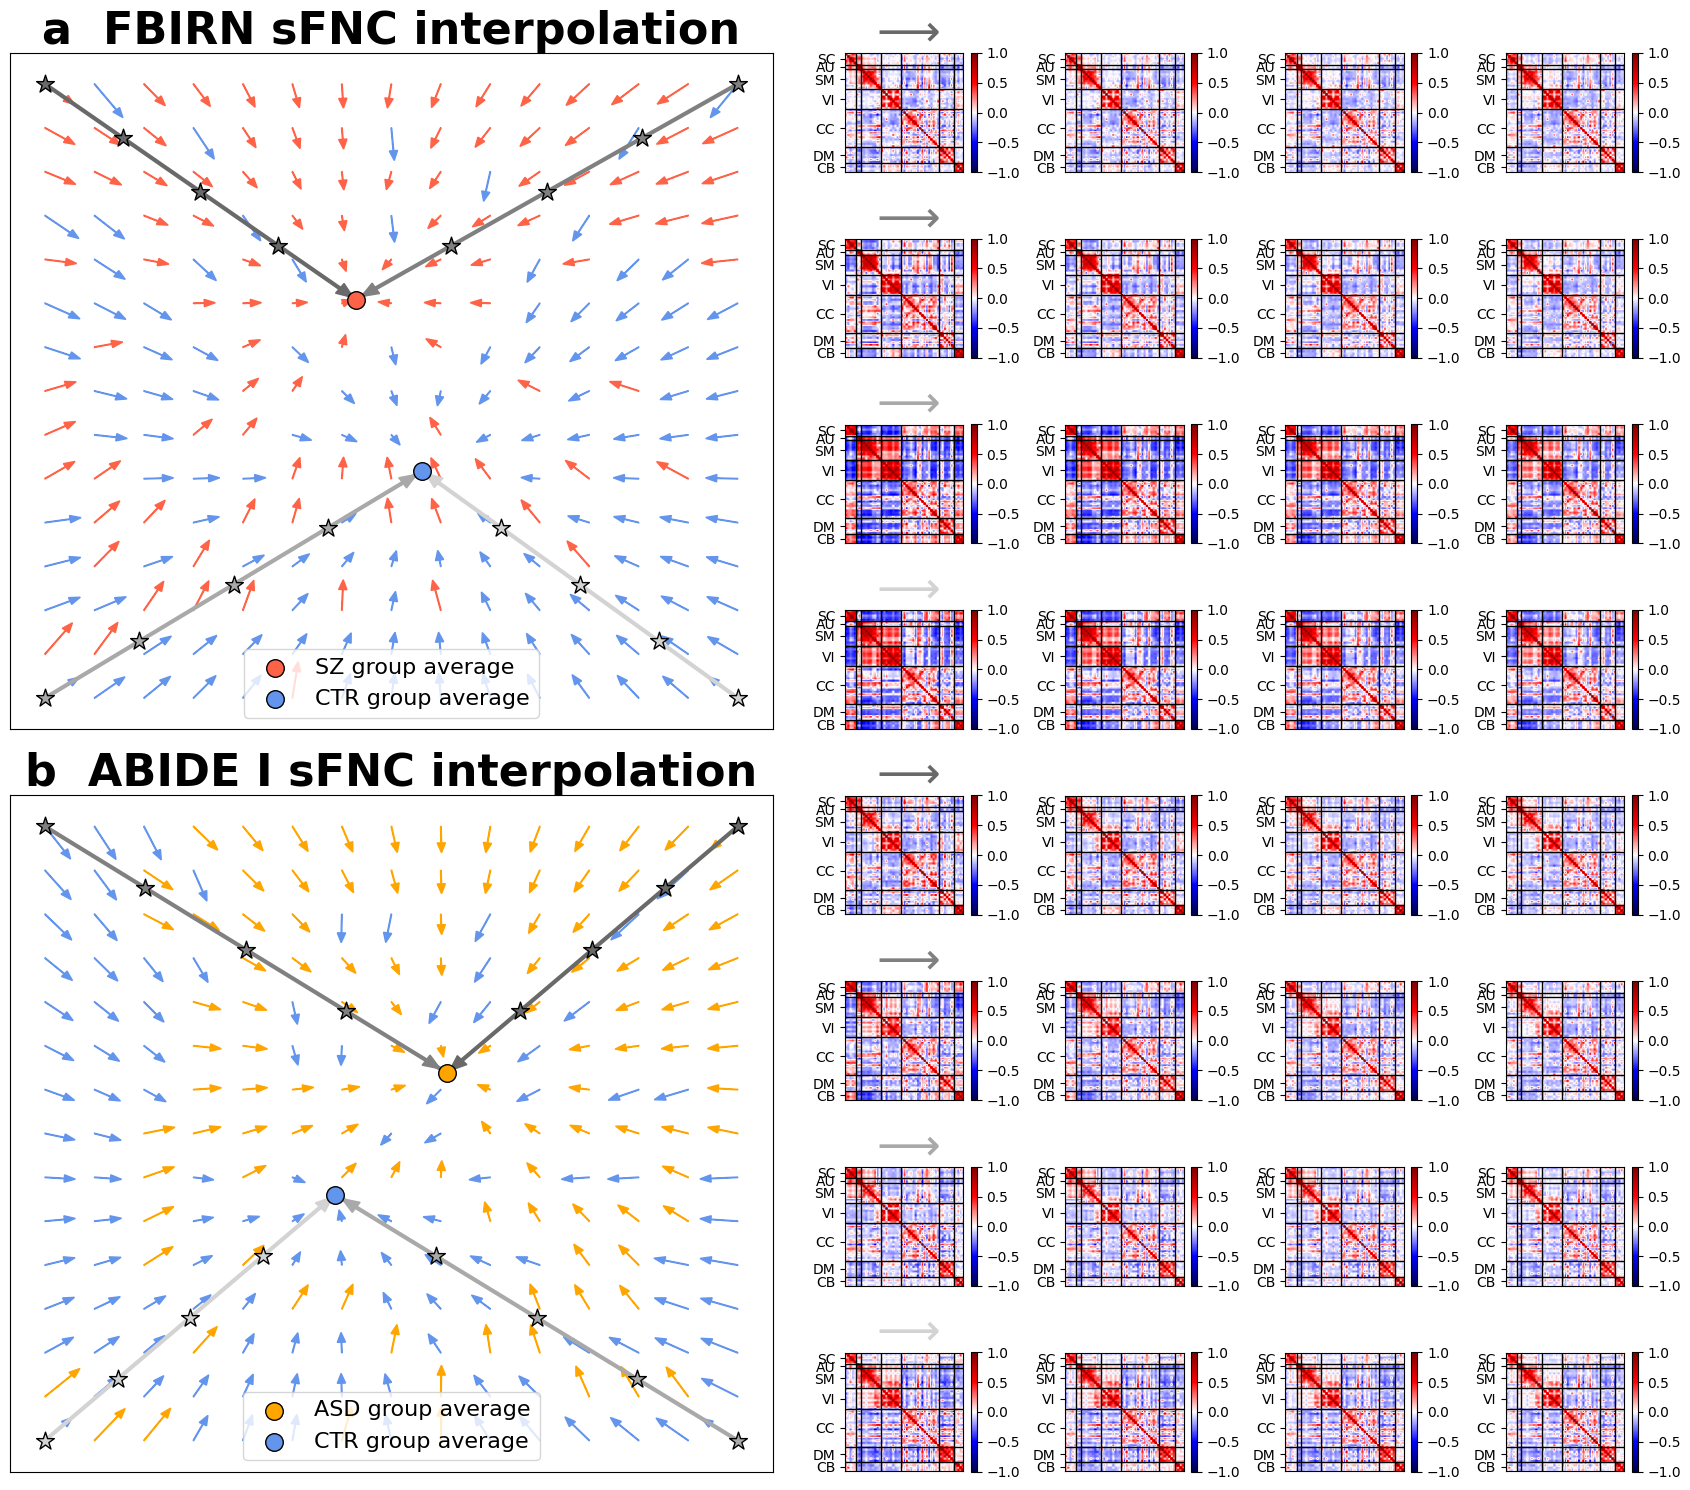

In [4]:
n_sub = 225
n_sz = 105
n_asd = 113
ms = 5
centroid_ms = 160
lw = 3
scalar = 1/np.sqrt(n_sub)
alpha = 0.92
beta = 0.35
color_list = ['dimgray', 'gray', 'darkgray', 'lightgray']
corners = np.array([[0,0], [0,1], [1,0], [1,1]])

fig, axes = plt.subplots(nrows=8, ncols=9, figsize=(17,15), gridspec_kw={'width_ratios': [0.8]*5+[1.25]*4})
gs = axes[0, 0].get_gridspec()

# SZ
centroid_sz = np.mean(grid_jv_sz[:n_sz, :], axis=0)
centroid_fbirn_hc = np.mean(grid_jv_sz[n_sz:, :], axis=0)

# remove the underlying axes
for i in range(5):
    for ax in axes[:4, i]:
        ax.remove()
axbig = fig.add_subplot(gs[:4, :5])

for i in range(n_sub):
    if i < n_sz:
        axbig.arrow(grid_jv_sz[i,0], grid_jv_sz[i,1], scalar*(centroid_sz[0]-grid_jv_sz[i,0]), scalar*(centroid_sz[1]-grid_jv_sz[i,1]), color='tomato', head_width=0.012, head_length=0.016)#darkgray
    else:
        axbig.arrow(grid_jv_sz[i,0], grid_jv_sz[i,1], scalar*(centroid_fbirn_hc[0]-grid_jv_sz[i,0]), scalar*(centroid_fbirn_hc[1]-grid_jv_sz[i,1]), color='cornflowerblue', head_width=0.012, head_length=0.016)#lightgray

distance_sz = np.linalg.norm(corners - centroid_sz, axis=1)
distance_fbirn_hc = np.linalg.norm(corners - centroid_fbirn_hc, axis=1)

sz1 = corners[np.argsort(distance_sz)][0]
sz2 = corners[np.argsort(distance_sz)][1]
fbirn_hc1 = corners[np.argsort(distance_fbirn_hc)][1]
fbirn_hc2 = corners[np.argsort(distance_fbirn_hc)][0]

axbig.plot([sz1[0],centroid_sz[0]], [sz1[1],centroid_sz[1]], '-', c=color_list[0], linewidth=lw)
axbig.plot([sz2[0],centroid_sz[0]], [sz2[1],centroid_sz[1]], '-', c=color_list[1], linewidth=lw)
axbig.plot([fbirn_hc1[0],centroid_fbirn_hc[0]], [fbirn_hc1[1],centroid_fbirn_hc[1]], '-', c=color_list[2], linewidth=lw)
axbig.plot([fbirn_hc2[0],centroid_fbirn_hc[0]], [fbirn_hc2[1],centroid_fbirn_hc[1]], '-', c=color_list[3], linewidth=lw)

sz1_x, sz1_y, sz1_dx, sz1_dy = compute_arrow(centroid_sz, sz1, alpha, beta)
sz2_x, sz2_y, sz2_dx, sz2_dy = compute_arrow(centroid_sz, sz2, alpha, beta)
fbirn_hc1_x, fbirn_hc1_y, fbirn_hc1_dx, fbirn_hc1_dy = compute_arrow(centroid_fbirn_hc, fbirn_hc1, alpha, beta)
fbirn_hc2_x, fbirn_hc2_y, fbirn_hc2_dx, fbirn_hc2_dy = compute_arrow(centroid_fbirn_hc, fbirn_hc2, alpha, beta)

axbig.arrow(sz1_x, sz1_y, sz1_dx, sz1_dy, color=color_list[0], head_width=0.02, head_length=0.025)
axbig.arrow(sz2_x, sz2_y, sz2_dx, sz2_dy, color=color_list[1], head_width=0.02, head_length=0.025)
axbig.arrow(fbirn_hc1_x, fbirn_hc1_y, fbirn_hc1_dx, fbirn_hc1_dy, color=color_list[2], head_width=0.02, head_length=0.025)
axbig.arrow(fbirn_hc2_x, fbirn_hc2_y, fbirn_hc2_dx, fbirn_hc2_dy, color=color_list[3], head_width=0.02, head_length=0.025)

axbig.scatter(centroid_sz[0], centroid_sz[1], marker='o', c='tomato', edgecolors='k', s=centroid_ms, label='SZ group average', zorder=5)
axbig.scatter(centroid_fbirn_hc[0], centroid_fbirn_hc[1], marker='o', c='cornflowerblue', edgecolors='k', s=centroid_ms, label='CTR group average', zorder=5)
axbig.legend(loc='lower center', fontsize=16)
axbig.set_title('a  FBIRN sFNC interpolation', color="k", fontweight="bold", fontsize=32)

anchor_list = [np.linspace(sz1, centroid_sz, 5)[:-1], np.linspace(sz2, centroid_sz, 5)[:-1], np.linspace(fbirn_hc1, centroid_fbirn_hc, 5)[:-1], np.linspace(fbirn_hc2, centroid_fbirn_hc, 5)[:-1]]

for i in range(4):
    for j in range(4):
        axbig.scatter(anchor_list[i][j,0], anchor_list[i][j,1], marker='*', s=180, c=color_list[i], edgecolors='k', zorder=2)

axbig.set_xticks([], [])
axbig.set_yticks([], [])

z_train = np.load(os.path.join(res_path_sz, 'z_train.npy'))
scale = np.percentile(np.abs(z_train), 80)

for i in range(4):
    for j in range(4):
        if j == 0:
            t = "$\\longrightarrow$"
        else:
            t = ""
        fnc = decode_fnc((anchor_list[i][j,0]-0.5)*scale*2, (anchor_list[i][j,1]-0.5)*scale*2, model_sz)
        plot_fnc(fnc, axes[i,j+5], title=t, title_color=color_list[i], title_fontsize=32, show_xticks=True, xticks_fontsize=10, show_colorbar=True)

# ASD
centroid_asd = np.mean(grid_jv_asd[:n_asd, :], axis=0)
centroid_abide_hc = np.mean(grid_jv_asd[n_asd:, :], axis=0)

# remove the underlying axes
for i in range(5):
    for ax in axes[4:, i]:
        ax.remove()
axbig = fig.add_subplot(gs[4:, :5])

for i in range(n_sub):
    if i < n_asd:
        axbig.arrow(grid_jv_asd[i,0], grid_jv_asd[i,1], scalar*(centroid_asd[0]-grid_jv_asd[i,0]), scalar*(centroid_asd[1]-grid_jv_asd[i,1]), color='orange', head_width=0.012, head_length=0.016)
    else:
        axbig.arrow(grid_jv_asd[i,0], grid_jv_asd[i,1], scalar*(centroid_abide_hc[0]-grid_jv_asd[i,0]), scalar*(centroid_abide_hc[1]-grid_jv_asd[i,1]), color='cornflowerblue', head_width=0.012, head_length=0.016)

distance_asd = np.linalg.norm(corners - centroid_asd, axis=1)
distance_abide_hc = np.linalg.norm(corners - centroid_abide_hc, axis=1)

asd1 = corners[np.argsort(distance_asd)][0]
asd2 = corners[np.argsort(distance_asd)][1]
abide_hc1 = corners[np.argsort(distance_abide_hc)][1]
abide_hc2 = corners[np.argsort(distance_abide_hc)][0]

axbig.plot([asd1[0],centroid_asd[0]], [asd1[1],centroid_asd[1]], '-', c=color_list[0], linewidth=lw)
axbig.plot([asd2[0],centroid_asd[0]], [asd2[1],centroid_asd[1]], '-', c=color_list[1], linewidth=lw)
axbig.plot([abide_hc1[0],centroid_abide_hc[0]], [abide_hc1[1],centroid_abide_hc[1]], '-', c=color_list[2], linewidth=lw)
axbig.plot([abide_hc2[0],centroid_abide_hc[0]], [abide_hc2[1],centroid_abide_hc[1]], '-', c=color_list[3], linewidth=lw)

asd1_x, asd1_y, asd1_dx, asd1_dy = compute_arrow(centroid_asd, asd1, alpha, beta)
asd2_x, asd2_y, asd2_dx, asd2_dy = compute_arrow(centroid_asd, asd2, alpha, beta)
abide_hc1_x, abide_hc1_y, abide_hc1_dx, abide_hc1_dy = compute_arrow(centroid_abide_hc, abide_hc1, alpha, beta)
abide_hc2_x, abide_hc2_y, abide_hc2_dx, abide_hc2_dy = compute_arrow(centroid_abide_hc, abide_hc2, alpha, beta)

axbig.arrow(asd1_x, asd1_y, asd1_dx, asd1_dy, color=color_list[0], head_width=0.02, head_length=0.025)
axbig.arrow(asd2_x, asd2_y, asd2_dx, asd2_dy, color=color_list[1], head_width=0.02, head_length=0.025)
axbig.arrow(abide_hc1_x, abide_hc1_y, abide_hc1_dx, abide_hc1_dy, color=color_list[2], head_width=0.02, head_length=0.025)
axbig.arrow(abide_hc2_x, abide_hc2_y, abide_hc2_dx, abide_hc2_dy, color=color_list[3], head_width=0.02, head_length=0.025)

axbig.scatter(centroid_asd[0], centroid_asd[1], marker='o', c='orange', edgecolors='k', s=centroid_ms, label='ASD group average', zorder=5)
axbig.scatter(centroid_abide_hc[0], centroid_abide_hc[1], marker='o', c='cornflowerblue', edgecolors='k', s=centroid_ms, label='CTR group average', zorder=5)
axbig.legend(loc='lower center', fontsize=16)
axbig.set_title('b  ABIDE I sFNC interpolation', color="k", fontweight="bold", fontsize=32)

anchor_list = [np.linspace(asd1, centroid_asd, 5)[:-1], np.linspace(asd2, centroid_asd, 5)[:-1], np.linspace(abide_hc1, centroid_abide_hc, 5)[:-1], np.linspace(abide_hc2, centroid_abide_hc, 5)[:-1]]

for i in range(4):
    for j in range(4):
        axbig.scatter(anchor_list[i][j,0], anchor_list[i][j,1], marker='*', s=180, c=color_list[i], edgecolors='k', zorder=2)

axbig.set_xticks([], [])
axbig.set_yticks([], [])

z_train = np.load(os.path.join(res_path_asd, 'z_train.npy'))
scale = np.percentile(np.abs(z_train), 80)

for i in range(4):
    for j in range(4):
        if j == 0:
            t = "$\\longrightarrow$"
        else:
            t = ""
        fnc = decode_fnc((anchor_list[i][j,0]-0.5)*scale*2, (anchor_list[i][j,1]-0.5)*scale*2, model_asd)
        plot_fnc(fnc, axes[i+4,j+5], title=t, title_color=color_list[i], title_fontsize=32, show_xticks=True, xticks_fontsize=10, show_colorbar=True)

plt.tight_layout()
plt.savefig('interpolation_latent_space_sfnc.pdf')